In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "F:/Supsi/COVID-19-Tweets/large_files/rt_network/louvain/big_network/df_degree.csv"

In [3]:
degree = pd.read_csv(path)
flt = degree[degree["degree"]>100]
degrees = list(flt["degree"])
print(len(degrees))
print(len(degree))
np.mean(degrees)

68340
12513502


494.30459467369036

{'whiskers': [<matplotlib.lines.Line2D at 0x12c81c13c10>,
 'caps': [<matplotlib.lines.Line2D at 0x12c81c20370>,
 'boxes': [<matplotlib.lines.Line2D at 0x12c81c13880>],
 'medians': [<matplotlib.lines.Line2D at 0x12c81c20a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c81c20e20>],
 'means': []}

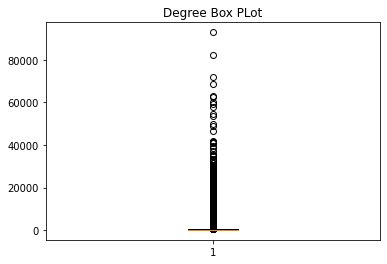

In [9]:
fig1, ax1 = plt.subplots()
ax1.set_title('Degree Box PLot')
ax1.boxplot(degrees)

In [20]:
flt_2 = degree[(degree["degree"]>200) & (degree["degree"]<2000)]
df = flt_2.sample(n=10)
df
# sad_sadfaces, gingin21

,name,degree
17660,gingin21,325
27965,zeolyne_,216
22508,Altai_Armande,261
26672,350,225
14102,FrakerMonica,403
13290,Direri,428
19651,InnovativeHindu,295
5782,alishakaytyler_,962
13363,fabricearfi,426
15349,criticolombia,372


In [14]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/"
info = pd.read_csv(path  + "all_good_users.csv")
disinfo = pd.read_csv(path  + "disinformation_users.csv")[["screen_name"]]
info

,screen_name
0,JeremyFarrar
1,AdamJKucharski
2,cmyeaton
3,MarionKoopmans
4,nataliexdean
...,...
255,MattFrieman
256,Iplaywithgerms
257,greg_folkers
258,jmayer0716


In [15]:
info_merged = info.merge(degree, left_on="screen_name", right_on="name", how="left")
info_merged

,screen_name,name,degree
0,JeremyFarrar,JeremyFarrar,3410.0
1,AdamJKucharski,AdamJKucharski,1982.0
2,cmyeaton,cmyeaton,3571.0
3,MarionKoopmans,MarionKoopmans,532.0
4,nataliexdean,nataliexdean,2014.0
...,...,...,...
255,MattFrieman,MattFrieman,93.0
256,Iplaywithgerms,Iplaywithgerms,70.0
257,greg_folkers,greg_folkers,336.0
258,jmayer0716,jmayer0716,35.0


In [16]:
disinfo_merged = disinfo.merge(degree, left_on="screen_name", right_on="name", how="left")
disinfo_merged

,screen_name,name,degree
0,mercola,mercola,269.0
1,RobertKennedyJr,RobertKennedyJr,581.0
2,TyCharleneB,NaN,NaN
3,BusyDrT,BusyDrT,1281.0
4,IslamRizza,NaN,NaN
5,DrButtar,DrButtar,417.0
6,unhealthytruth,unhealthytruth,179.0
7,sayerjigmi,NaN,NaN
8,KellyBroganMD,NaN,NaN
9,DrChrisNorthrup,DrChrisNorthrup,20.0


In [17]:
print(np.mean(disinfo_merged["degree"]))
print(np.mean(info_merged["degree"]))

393.42857142857144
1290.7936507936508


In [14]:
def clean_url(df):
    yt_df = df[(df["urls"].str.contains("https://youtu.be")) | (df["urls"].str.contains("https://youtube"))]
    screen_name = []
    lst_urls = []
    for row in tqdm(yt_df.itertuples()):
        url_exp = row.urls.split(" ")    
        for exp in range(len(url_exp)):
            if url_exp[exp] == "'expanded_url':":
                lst_urls.append(url_exp[exp + 1][1:-2])
                screen_name.append(row.user_screen_name)
    parsed = pd.DataFrame(list(zip(screen_name,lst_urls)), columns=["user_screen_name", "link"])
    

In [15]:
from tqdm.notebook import tqdm
df_parsed = clean_url(df)

In [16]:
df_parsed

,user_screen_name,link
0,Graziel65255465,https://youtu.be/-gdwEs4Ficw
1,xenonian1,https://youtu.be/DouCbWbLa7E
2,xenonian1,https://youtu.be/AwRqhGfRAlc
3,MFulvia,https://youtu.be/HB994BBNLok
4,bluebird19473,https://youtu.be/8pC1xwFfS_g
...,...,...
15956,DiegoDan80,https://youtu.be/XEQ2-jssdFI
15957,Euro_comunica,https://youtu.be/FoZJXSbclZA
15958,KattInForma,https://youtu.be/6VHVvogoyTE
15959,KattInForma,https://youtu.be/j2-Guu_no_8


In [2]:
import pandas as pd
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/tweets_with_urls_and_domain_and_score (4.0).parquet"
df = pd.read_parquet(path, engine="fastparquet")
df

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,media,user_tweets_count,user_friends_count,user_followers_count,domain,number_of_urls,LOW,HIGH,UNKW,SOCIAL
0,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,...,[],NaN,NaN,NaN,[leccesette.it],1,0,0,1,0
1,1221738978585563136,1221738978585563136,Mon Jan 27 10:17:25 +0000 2020,166708308,Asgard_Hydra,False,Wed Jul 14 20:31:11 +0000 2010,Ricercatori a lavoro per produrre vaccino cont...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,...,[],NaN,NaN,NaN,[tech.everyeye.it],1,0,0,1,0
2,1221728158371786752,1221728158371786752,Mon Jan 27 09:34:26 +0000 2020,836069429209227264,italyinkz,True,Mon Feb 27 04:24:20 +0000 2017,"#27gennaio \n""Coltivare la Memoria è ancora og...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],NaN,NaN,NaN,[twitter.com],1,0,0,0,1
3,1221735550585053186,1221735550585053186,Mon Jan 27 10:03:48 +0000 2020,1019640307065982979,CeSPI_Roma,False,Wed Jul 18 17:49:28 +0000 2018,Per chi crede nella democrazia nel rispetto de...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,"[{'id': 1221735545799352322, 'id_str': '122173...",NaN,NaN,NaN,[cespi.it],1,0,0,1,0
4,1221734125725540352,1221734125725540352,Mon Jan 27 09:58:08 +0000 2020,59720254,_teo777,False,Fri Jul 24 07:35:06 +0000 2009,"Piove, novacse ladro!\n\n""Avete fatto vincere""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],NaN,NaN,NaN,[twitter.com],1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030907,1394609850089345025,1394609850089345025,Tue May 18 11:04:33 +0000 2021,71210454,tuttoggi,False,Thu Sep 03 09:01:38 +0000 2009,Anche i carabinieri del Nas potrebbero interes...,"<a href=""https://www.postpickr.com"" rel=""nofol...",None,...,[],93104.0,228.0,3744.0,[tuttoggi.info],1,0,0,1,0
1030908,1394609946881298432,1394609946881298432,Tue May 18 11:04:56 +0000 2021,2926782875,Mustapha1508,False,Wed Dec 17 10:59:26 +0000 2014,"Vaccino, dopo il caso della 23enne un altro er...","<a href=""http://twitter.com/download/iphone"" r...",None,...,[],50672.0,5003.0,3923.0,[csera.it],1,0,1,0,0
1030909,1394610031262306304,1394610031262306304,Tue May 18 11:05:16 +0000 2021,4309630395,Ileana0406,False,Sat Nov 28 18:18:40 +0000 2015,"Vaccini, nuovo errore di somministrazione in T...","<a href=""http://twitter.com/download/iphone"" r...",None,...,[],21105.0,1130.0,833.0,[tgcom24.mediaset.it],1,0,1,0,0
1030910,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],79297.0,772.0,893.0,[twitter.com],1,0,0,0,1
